In [187]:
import pandas as pd
import numpy as np
import cv2
from os import listdir
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Each image is resized to 20x20 three-channel pixels and flatten aftewards.

flatten data are used as features.

KNN classifier is used and K = 1 seems to work properly.


In [173]:
data = []
labels = []
for i, filename in enumerate(listdir("Q12_Dataset/")):
    c = cv2.imread("Q12_Dataset/"+filename)
    c = cv2.resize(c, (20, 20))
    data.append(c)
    labels.append(int('m' in filename))

In [174]:
def calculate_dists(X, X_train):
    X2 = (X**2).sum(axis=1).reshape((X.shape[0], 1)) * np.ones((1, X_train.shape[0]))
    XT2 = (X_train**2).sum(axis=1) * np.ones((X.shape[0], 1))
    XXT = X @ X_train.T
    dists = np.sqrt(X2 + XT2 - 2*XXT)
    return dists
def KNN_predict(dists, k):
    max_args = dists.argsort()[:, :k]
    votes = pd.DataFrame(max_args).applymap(lambda x: train_label[x])
    predict = votes.mode(axis=1)[0].values
    return predict

In [202]:
def preprocess_data(data, labels, test_size=25):
    train_data = deepcopy(data)
    train_label = deepcopy(labels)
    test_data = []
    test_label = []
    for i in range(test_size):
        j = np.random.randint(0, len(train_label))
        test_data.append(train_data.pop(j))
        test_label.append(train_label.pop(j))
    test_data = np.array(test_data).reshape((test_size,-1))
    train_data = np.array(train_data).reshape((len(train_label),-1))
    test_data = test_data / 255
    train_data = train_data / 255
    return train_data, test_data, np.array(train_label), np.array(test_label)


In [203]:
def get_confusion_matrix(predicted, test_label):
    confusion_matrix = np.zeros((2, 2))
    for i, p in enumerate(predicted):
        confusion_matrix[test_label[i], int(p)] += 1
    return confusion_matrix


In [241]:
train_data, test_data, train_label, test_label = preprocess_data(data, labels, 25)
dists = calculate_dists(test_data, train_data)
predicted = KNN_predict(dists, 1)
confusion_matrix = get_confusion_matrix(predicted, test_label)

print("CCR is ", (confusion_matrix.diagonal()).sum()/len(test_label))
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.96
Confusion Matrix:
[[17.  0.]
 [ 1.  7.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


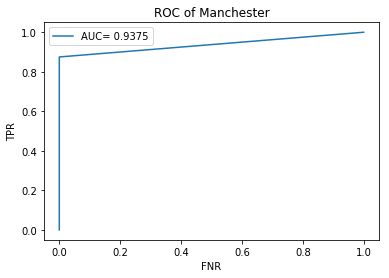

In [242]:
fpr, tpr, threshold = roc_curve(test_label, predicted, drop_intermediate=False)
plt.plot(fpr, tpr, label="AUC= "+str(roc_auc_score(test_label, predicted)))
plt.title("ROC of Manchester")
plt.ylabel("TPR")
plt.xlabel("FNR")
plt.legend()
plt.show()

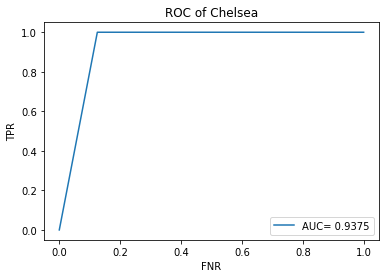

In [243]:
fpr, tpr, threshold = roc_curve(1-test_label, 1-predicted, drop_intermediate=False)
plt.plot(fpr, tpr, label="AUC= "+str(roc_auc_score(1-test_label, 1-predicted)))
plt.title("ROC of Chelsea")
plt.ylabel("TPR")
plt.xlabel("FNR")
plt.legend()
plt.show()